# **[Week 3] Linear Classification Practice**

## **Objective**
* Implement a Perceptron Classifier
* Understand and Implement Gradient Descent on Synthetic Data
  * Compute Loss and Gradients of Perceptron 
  * Apply Gradient Descent on Perceptron Weights and Bias
  * Train a Perceptron with Stochastic Gradient Descent (SGD)
  * Train a Perceptron with mini-Batch Gradient Descent (SGD)
    * Train a Perceptron with SGD Using Scikit-Learn Package 

* Implement a Perceptron and Train Perceptron on Iris Dataset


In [1]:
# Setting
import numpy as np
import sklearn

import matplotlib.pyplot as plt

# Task 1: Train a Linear Classifier on Synthetic Data

### Generating Synthetic Data from Gaussian Distribution 
* Generate synthetic training data that follows two different gaussian distributions with different mean and variance
* Generate synthetic test data that follows same distributions with training data
* Plot the sample training data points.

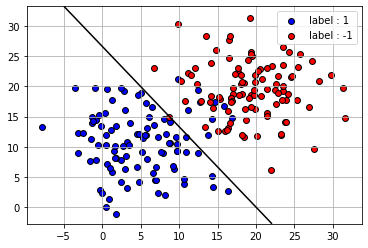

In [2]:
# generate samples from normal distributions with two dimensional
np.random.seed(0)
n = 100 # size of samples
X1 = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc and scale indicate mean and variance
X2 = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1 and X2 have different mean
T1 = np.ones(n)
T2 = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_train = np.concatenate((X1, X2))
T_train = np.concatenate((T1, T2))

X1_test = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc and scale indicate mean and variance
X2_test = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1 and X2 have different mean
T1_test = np.ones(n)
T2_test = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_test = np.concatenate((X1_test, X2_test))
T_test = np.concatenate((T1_test, T2_test))

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]

ab = np.array([-0.4, -0.3])
c = np.array([8])


Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')

plt.show()

### Baseline - Random Search 
* Implement and evaluate the most simplest baseline method of random search

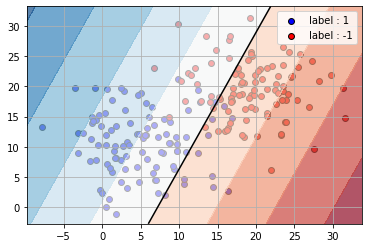

Training Accuracy :84.00%
Test Accuracy :84.00%


In [3]:
best_acc = 0
max_iter = 1000
Pred_acc_best = 0
np.random.seed(0)
for i in range(max_iter):
  ab = np.random.normal(size=2) # Randomly Generate the Classifier Parameters 
  c = np.random.normal(size=1)
  Pred_train = np.matmul(X_train, ab) + c
  Y_train = 2 * ((Pred_train) >= 0) - 1 
  Pred_acc = np.sum((Y_train == T_train)) / len(Y_train)
  if Pred_acc >= Pred_acc_best:
    Pred_acc_best = Pred_acc # Update the Best Parameter Whenever the Best Training Sampple Accuracy Is Updated 
    best_ab = ab
    best_c = c

Pred_train = X_train@best_ab + best_c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@best_ab + best_c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@best_ab + best_c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()

#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

### Train a Linear Classifier (Perceptron) with Gradient Descent
**Objective:** Compute Loss and Gradients in Perceptron, and Update Parameters of Perceptron

* Compute loss of Perceptron (refer to the page 15 in Lecture Note)
* Compute Gradients by differentiating the loss (refer to the page 16-19 in Lecture Note)
* Update parameters by Gradient Descent (refer to the page 16-19 in Lecture Note)

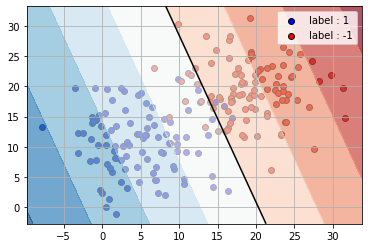

Training Accuracy :93.00%
Test Accuracy :93.00%


In [4]:
max_iter = 1000
learning_rate = 0.01
np.random.seed(0)
ab = np.random.normal(size=2)   # Randomly Generate the Classifier Parameters 
c = np.random.normal(size=1)

for i in range(max_iter):
  Pred_train = np.matmul(X_train, ab) + c
  Y_train = 2 * ((Pred_train) >= 0) - 1

  loss = np.sum(Pred_train * (Y_train-T_train))
  grad_a = np.sum(X_train[:,0] * (Y_train - T_train))
  grad_b = np.sum(X_train[:,1] * (Y_train - T_train))
  grad_c = np.sum((Y_train - T_train))
  

  ab[0] -= learning_rate * grad_a
  ab[1] -= learning_rate * grad_b
  c -= learning_rate * grad_c

Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  
plt.show()
#Print Training Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

### Train a Perceptron with Stochastic Gradient Descent (SGD)
**Objective:** Implement Stochastic Gradient Descent (SGD) Algorithm
* Update parameters by Stochastic Gradient Descent (refer to the page 16 in Lecture Note)

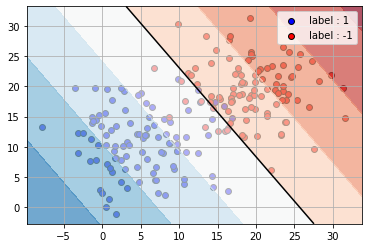

Training Accuracy :93.00%
Test Accuracy :93.50%


In [5]:
max_iter = 1000
learning_rate = 0.01
np.random.seed(0)
ab = np.random.normal(size=2)   # Randomly Generate the Classifier Parameters 
c = np.random.normal(size=1)

for i in range(max_iter):
  indices = np.arange(len(X_train))
  np.random.shuffle(indices)
  X_train_shuffle = X_train[indices]
  T_train_shuffle = T_train[indices]
    
  for j in range(len(X_train)):
    x_train = X_train_shuffle[j,:]
    t_train = T_train_shuffle[j]
    pred_train = np.matmul(x_train, ab) + c
    y_train = 2 * (pred_train >= 0) - 1
    
    loss = pred_train * (y_train-t_train)
    grad_a = (x_train[0] * (y_train-t_train))
    grad_b = (x_train[1] * (y_train-t_train))
    grad_c = (y_train - t_train)
    
    ab[0] -= learning_rate * grad_a[0]
    ab[1] -= learning_rate * grad_b[0]
    c -= learning_rate * grad_c

Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  
plt.show()
#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

### Train a Perceptron with mini-Batch SGD
**Objective:** Implement mini-Batch SGD Algorithm
* Update parameters by mini-Batch SGD (refer to the page 16 in Lecture Note)

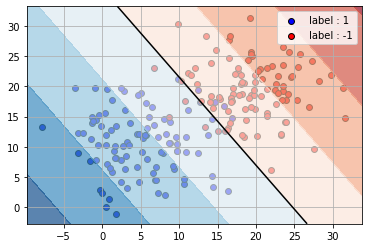

Training Accuracy :94.50%
Test Accuracy :94.00%


In [6]:
max_iter = 1000
learning_rate = 0.01
np.random.seed(0)
ab = np.random.normal(size=2)   # Randomly Generate the Classifier Parameters 
c = np.random.normal(size=1)

batchsize = 10
n_batches = len(X_train) // batchsize
 
for i in range(max_iter):
  indices = np.arange(len(X_train))
  np.random.shuffle(indices)
  X_train_shuffle = X_train[indices]
  T_train_shuffle = T_train[indices]
    
  for j in range(n_batches):
    x_train = X_train_shuffle[batchsize*j:batchsize*(j+1),:]
    t_train = T_train_shuffle[batchsize*j:batchsize*(j+1)]

    pred_train = np.matmul(x_train, ab) + c
    y_train = 2 * (pred_train >= 0) - 1
    
    loss = pred_train * (y_train-t_train)
    grad_a = np.sum(x_train[:,0] * (y_train - t_train))
    grad_b = np.sum(x_train[:,1] * (y_train - t_train))
    grad_c = np.sum((y_train - t_train))
    
    ab[0] -= learning_rate * grad_a
    ab[1] -= learning_rate * grad_b
    c -= learning_rate * grad_c

Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  
plt.show()
#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

### Train a Perceptron Using Scikit-Learn Package
**Objective:** Try to use an open source machine learning library of scikit-learn
* Train a Perceptron with SGD using scikit-learn library

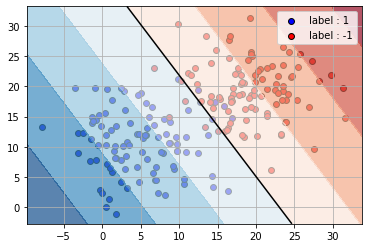

Training Accuracy :95.00%
Test Accuracy :95.00%


In [7]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

model = Perceptron(eta0=0.01, max_iter=1000, n_iter_no_change=500)
model.fit(X_train, T_train)

ab=model.coef_.T
c=model.intercept_

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7) 
plt.show()

Y_train = model.predict(X_train)
Y_test = model.predict(X_test)

#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(T_train, Y_train)))
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(T_test, Y_test)))

# Task 2: Train a Perceptron on Iris Dataset 

**Objective:** Train a Percetron on a real data 
* Train a Perceptron on Iris Dataset with SGD using scikit-learn library


In [8]:
### Load Iris Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Iris = load_iris()

X_Data = Iris.data
Y_Data = Iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Data, test_size=0.3, random_state = 0)

In [9]:
model = Perceptron(eta0=0.1, max_iter=1000)
model.fit(X_train, Y_train)
Y_Pred_train = model.predict(X_train)
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))

Y_Pred_test = model.predict(X_test)
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

Training Accuracy :89.52%
Test Accuracy :80.00%


# Task 3 (Optional): Train a Perceptron on 2 Class MNIST

**Things to do:**

1. Vetorization (convert to 2D image to 1D vector form) -> using ```reshape()``` method
2. Standardization (normalize data to 0-1 range) -> just divide by 255

In [10]:
# {4, 9} classes mnist dataset download and decompress
!pip install gdown
!gdown --id 1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
!tar -xvf mnist_49.tar
!rm -f mnist_49.tar

Downloading...
From: https://drive.google.com/uc?id=1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
To: /home/yjjerico/Jupyter/EE488/week3/mnist_49.tar
10.9MB [00:00, 18.2MB/s]
mnist_49/
mnist_49/X_train.npy
mnist_49/X_test.npy
mnist_49/Y_test.npy
mnist_49/Y_train.npy


Shape of data: (28, 28)
Number of train data: 11791
Number of test data: 1991


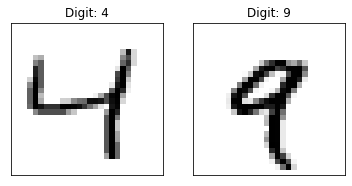

In [11]:
# Load the dataset
X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

# Basic Descriptions of dataset
print('Shape of data: {}'.format(X_train.shape[1:]))
print('Number of train data: {}'.format(len(Y_train)))
print('Number of test data: {}'.format(len(Y_test)))

# Image plotting
plt.subplot(1, 2, 1)
plt.imshow(X_train[Y_train==0][0], cmap='gray_r')
plt.title('Digit: 4')
plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(X_train[Y_train==1][0], cmap='gray_r')
plt.title('Digit: 9')
plt.xticks([]); plt.yticks([])
plt.show()

**Vectorization & Standardization**

In [12]:
# Reshape the training and test examples

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print('X_train_flatten shape: ' + str(X_train_flatten.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('X_test_flatten shape: ' + str(X_test_flatten.shape))
print('Y_test shape: ' + str(Y_test.shape))

X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

X_train_flatten shape: (11791, 784)
Y_train shape: (11791,)
X_test_flatten shape: (1991, 784)
Y_test shape: (1991,)


**Model Training**

In [13]:
model = Perceptron(eta0=0.1, max_iter=5000)
model.fit(X_train_std, Y_train)
Y_Pred_train = model.predict(X_train_std)
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))

Y_Pred_test = model.predict(X_test_std)
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

Training Accuracy :97.49%
Test Accuracy :96.74%


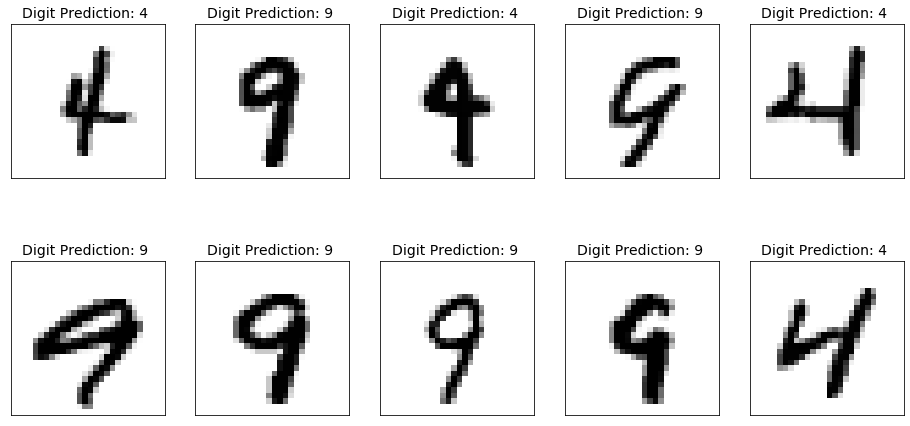

In [19]:
# Plotting results
np.random.seed(2020)
idxs = np.random.choice(len(Y_test), 10, replace=False)
label_to_class = {0: '4', 1: '9'}

plt.figure(figsize=(16, 8))
for i, idx in enumerate(idxs):
  plt.subplot(2, 5, i + 1)
  predict = model.predict(X_test_std)
  pred_label = (predict[idx] >= 0.5).astype(np.int)
  plt.imshow(X_test[idx], cmap='gray_r')
  plt.title('Digit Prediction: {} '.format(label_to_class[pred_label]), fontsize=14)
  plt.xticks([]); plt.yticks([])